<div style="text-align: right; font-weight: bold;">
東京工科大学コンピュータサイエンス学部<br>
福西広晃
</div>

----

<span style="font-size: 230%; color: black;">Pythonによるデータの操作と統計計算（表データ）</span>

----

**質問**<br>
エクセル（Excel）は表データを扱うツールです。エクセルででできることを挙げてみよう。

----

# Pandasとは
- データ操作を高速かつ効率的に扱うデータ解析支援ライブラリ
  - ライブラリとは、よく使う機能・関数をまとめて、簡単に使えるようにしたもの
<br><br>
- Pandasでできること
  - データの読み込み、整形、加工、結合、保存
  - データの検索・表計算・集計
  - データの可視化(グラフ作成)
<br><br>
- これらの操作はエクセルでも可能であるが、Pandasを利用すればエクセルでは扱えないような以下のことが可能になる→作業効率化
  - `大量データの高速処理`
  - `ルーチンワークの自動化`<br>
<br><br>
- pandasが使えることは、データサイエンスやAIの専門領域では必須であるが、日常業務でも利用できないわけではない。業務データ（例えば顧客データ）に対する処理を自動化し、業務効率化を行うことができれば企業内での評価も上がることでしょう

## Pandasのデータ型
- Pandasでは変数とテーブルデータ（表形式のデータ）を繋げて扱う
- Pandasには`DataFrame型`(データフレーム)と`Series型`(シリーズ)のデータ構造がある
  - `データフレーム`は、表データ（ラベル付き2次元データ）で`値`、`インデックス`（行）、`カラム`（列）から成る（Excelシートのイメージ）
  - `シリーズ`は、１次元データで`値`、 `インデックス`から成る（リスト型に類似）
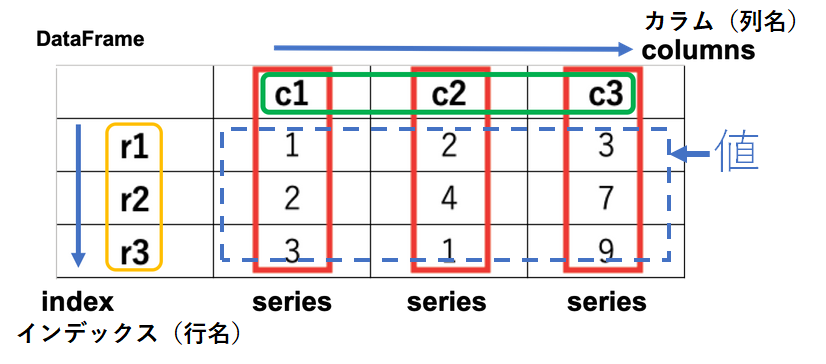



----

# 準備

## Pandasのインポート
- インポートとは`pandas`を使用できるように呼び出すこと。以下のように記述。
```Python 
import pandas as pd
```
- `as pd`とは、プログラム内でpandasを`pd`という名前で使用するということ。慣習的に`pd`とする。
- 一度インポートしておけば、プログラムファイルを閉じるまで利用できる

In [1]:
import pandas as pd

##  Excelファイルを出力するための`openpyxl`のインストール

In [2]:
#以下のコメントアウトを外してください
#! pip install openpyxl 

## Googleドライブ内のファイルに接続するための設定
- googleドライブ内のファイルを読み込み（またはデータを出力）を行うために、Googleドライブへの接続が必要（毎回の作業前）

**Googleドライブへの接続**

In [3]:
#以下のコメントアウトを外してください
#from google.colab import drive
#drive.mount('/content/drive')

----

# ファイルからのデータの読み込み

## Excelファイルの読み込み
- `read_excel`を用いて読み込み
```Python
データフレーム名 = pd.read_excel(読み込むExcelファイル, sheet_name="シート名")
```

In [4]:
import pandas as pd

# ファイルの指定
xlsxfile  = "dataset/都道府県別人口推移.xlsx" # dataset内のExcelファイル

# Googleドライブの場合は次のコメントアウトを外す
# xlsxfile = "drive/My Drive/Colab Notebooks/第03回_プログラム/dataset/都道府県別人口推移.xlsx""

# データの読み込み
df_population = pd.read_excel(xlsxfile, sheet_name="全データ")

# データの表示
display(df_population)

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
0,1,北海道,大正,9,1920,2359183,1244322,1114861
1,2,青森県,大正,9,1920,756454,381293,375161
2,3,岩手県,大正,9,1920,845540,421069,424471
3,4,宮城県,大正,9,1920,961768,485309,476459
4,5,秋田県,大正,9,1920,898537,453682,444855
...,...,...,...,...,...,...,...,...
934,43,熊本県,平成,27,2015,1786170,841046,945124
935,44,大分県,平成,27,2015,1166338,551932,614406
936,45,宮崎県,平成,27,2015,1104069,519242,584827
937,46,鹿児島県,平成,27,2015,1648177,773061,875116


## 練習
平成のみの都道府県別人口データが`dataset`フォルダの`都道府県別人口推移.xlsx`の`平成`のシートにある。このデータを`df_population_H`という名前のデータフレームに読み込んでみよう。また、`df_population_H`を表示してみよう。

## [参考] Webサイトの表データの取得
- read_htmlを用いて読み込む
- 第1引数はWebサイトのurl
- encodingを間違えると文字化けするので注意(`utf-8`か`shift_jis`の可能性が高い)
- 取得した表データはリスト型で格納される
  - Webサイトに複数の表がある場合は次のように格納されている: [表1, 表2,・・・]
  - 特定の表を取り出す場合はインデックス(要素番号)を指定
- [ここで扱うWebサイト](https://baseball.yahoo.co.jp/npb/stats/batter?gameKindId=1&type=avg)

In [6]:
import pandas as pd

# urlの設定
url = "https://baseball.yahoo.co.jp/npb/stats/batter?gameKindId=1&type=avg"

# 表データ取得
list_tables = pd.read_html(url, encoding='utf-8')

# インデックス(要素番号)0の表を取得
df_baseball = list_tables[0]

# 表示
display(df_baseball)

,順 位,選手名,打 率,試 合,打 席,打 数,安 打,二塁打,三塁打,本塁打,...,犠 打,犠 飛,盗 塁,盗塁死,併殺打,出塁率,長打率,ＯＰＳ,得点圏,失 策
0,1,サンタナ (ヤ),.309,82,319,278,86,21,0,11,...,0,3,1,1,7,.389,.504,.892,.303,3
1,2,山本 (デ),.2943,87,319,282,83,10,1,3,...,8,6,1,1,8,.341,.369,.710,.289,1
2,3,細川 (中),.2942,105,435,384,113,23,0,15,...,0,1,0,1,12,.375,.471,.846,.300,2
3,4,丸 (巨),.293,101,426,376,110,12,1,9,...,0,2,6,3,6,.371,.402,.772,.267,0
4,5,野間 (広),.292,79,324,288,84,10,4,1,...,3,0,6,5,3,.364,.365,.729,.308,1
5,6,宮﨑 (デ),.2881,89,339,295,85,18,0,9,...,0,1,0,1,7,.378,.441,.818,.268,7
6,7,長岡 (ヤ),.2875,102,421,386,111,21,1,6,...,9,3,2,1,5,.325,.394,.719,.326,8
7,8,佐野 (デ),.284,100,404,373,106,26,0,5,...,0,2,0,0,9,.334,.394,.728,.323,2
8,9,小園 (広),.283,99,407,371,105,9,3,1,...,5,3,8,8,5,.331,.332,.662,.316,11
9,10,吉川 (巨),.277,104,438,390,108,18,3,3,...,9,5,10,4,7,.331,.362,.693,.232,4


**自分の好きなWebページの表データを取得してみよう**

----

# ファイルへのデータの出力

## データフレームをExcelファイルとして出力
- **新規のExcelファイルに出力する場合**
```Python
データフレーム名.to_excel("Excelファイル名", sheet_name = "シート名")
```
sheet_nameは、エクセルのシート名を設定（名前は自由）
<br><br>

- **既存のExcelファイルにシートを追加して出力する場合**
```Python
with pd.ExcelWriter("Excelファイル名", engine="openpyxl", mode='a',  if_sheet_exists="replace") as writer:
      データフレーム名.to_excel(writer, sheet_name = "シート名", index=False)
```

以下の条件でデータを`新規`のEcelファイルに出力する例
- 出力するデータフレーム名：`df_population`
- Excelファイル名：`都道府県別人口推移_データ出力.xlsx`
- シート名：`都道府県別人口推移_全データ`<br>

実行後にExcelファイルを開いて確認してみよう

In [7]:
# ファイルの指定
xlsxfile  = "都道府県別人口推移_データ出力.xlsx" # dataset内のxlsxファイル

# Googleドライブの場合は次のコメントアウトを外す
# xlsxfile = "drive/My Drive/Colab Notebooks/第03回_プログラム/都道府県別人口推移_データ出力.xlsx"

# 出力
sheet = "都道府県別人口推移_全データ" # シート名
df_population.to_excel(xlsxfile, sheet_name=sheet)

以下の条件でデータを`既存`のEcelファイルにシートを追加する例
- 出力するデータフレーム名：`df_population`
- Excelファイル名：`都道府県別人口推移_データ出力.xlsx`
- シート名：`都道府県別人口推移_全データ(追加)`<br>

実行後にExcelファイルを開いて確認してみよう

In [8]:
# シート追加
# 都道府県別人口推移_データ出力.xlsxのファイル名はxlsxfileに代入されているので利用する

sheet = "都道府県別人口推移_全データ(追加).xlsx" # シート名
with pd.ExcelWriter(xlsxfile, engine="openpyxl", mode='a',  if_sheet_exists="replace") as writer:
    df_population.to_excel(writer, sheet_name=sheet)

## 練習
最初の練習で使用した`df_population_H`のデータフレームをExcelファイルのシートに追加してみよう。実行後にExcelファイルを開いて確認してみよう。
- 出力するデータフレーム名: `df_population_H`
- Excelファイル名: `都道府県別人口推移_データ出力.xlsx`
- シート名: `都道府県別人口推移_平成`

解答例

In [9]:
# シート追加
# 都道府県別人口推移_データ出力.xlsxのファイル名はxlsxfileに代入されているので利用する

sheet = "都道府県別人口推移_平成.xlsx" # シート名
with pd.ExcelWriter(xlsxfile, engine="openpyxl", mode='a',  if_sheet_exists="replace") as writer:
    df_population_H.to_excel(writer, sheet_name=sheet)

----

# データ構造の確認

## サンプル数の確認
- データ分析において、サンプル数（データ数）を報告することは必須
- サンプル数はデータフレームの行数に対応
- 組み込み関数の`len関数`を使用して行数を取得すればよい

In [10]:
# 行数（サンプル数）を取得
num_sample = len(df_population)

# 表示
print("行数:", num_sample)

行数: 939


## 練習
最初の練習で使用した`df_population_H`の行数を表示することによってサンプル数を確認してみよう

----

# 特定の列または行の抽出

## 先頭行または末尾行のデータを抽出
- 先頭x行を抽出
```
データフレーム名.head(x)
```
- 先頭5行の場合のみ`データフレーム名.head()`でも可能
- データをざっくりと確認するために`head()`は非常によく使う
<br><br>
- 末尾x行を抽出
```
データフレーム名.tail(x)
```

In [12]:
# 先頭3行を表示
df_head = df_population.head(3)
display(df_head)

# 末尾5行を表示
df_tail = df_population.tail(5)
display(df_tail)

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
0,1,北海道,大正,9,1920,2359183,1244322,1114861
1,2,青森県,大正,9,1920,756454,381293,375161
2,3,岩手県,大正,9,1920,845540,421069,424471


,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
934,43,熊本県,平成,27,2015,1786170,841046,945124
935,44,大分県,平成,27,2015,1166338,551932,614406
936,45,宮崎県,平成,27,2015,1104069,519242,584827
937,46,鹿児島県,平成,27,2015,1648177,773061,875116
938,47,沖縄県,平成,27,2015,1433566,704619,728947


## 1列抽出
```
データフレーム名["列名"]
```

- 抽出された1列は`Series型`

In [13]:
# 人口（総数）の列を抽出
col = df_population["人口（総数）"]

display(col)

0      2359183
1       756454
2       845540
3       961768
4       898537
        ...   
934    1786170
935    1166338
936    1104069
937    1648177
938    1433566
Name: 人口（総数）, Length: 939, dtype: int64

## 複数列を抽出
```
データフレーム名[リスト]
→データフレーム名[["列名1","列名2", ・・・]]
```
- 抽出された複数列は`DataFrame型`

In [14]:
# 人口（総数）、人口（男）、人口（女)の3列を抽出
df_cols = df_population[["人口（総数）", "人口（男）", "人口（女）"]]

display(df_cols)

,人口（総数）,人口（男）,人口（女）
0,2359183,1244322,1114861
1,756454,381293,375161
2,845540,421069,424471
3,961768,485309,476459
4,898537,453682,444855
...,...,...,...
934,1786170,841046,945124
935,1166338,551932,614406
936,1104069,519242,584827
937,1648177,773061,875116


## 練習

(1) 最初の練習で用いた`df_population_H`の先頭10行を`df_head`に代入し、表示してみよう

(2) `df_population_H`の都道府県コードと都道府県名の2列を`df_cols`に代入し、表示してみよう

----

# 条件に一致したデータの抽出
- 演算子一覧
- Pandasの論理演算子は`and`、`or`、`not`の表記が使えないことに注意<br><br>

|          |     |                      |
|:-:       |:-:  |:--                   |
|比較演算子| <   | 小さい               |
|          | >   | 大きい               |
|          | <=  | 以上                 |
|          | >=  | 以下                 |
|          | ==  | 等しい               |
|          | !=  | 等しくない           |
|論理演算子| &   | 両者を満たす         |
|          | \|  | どちらか片方を満たす |
|          | !=  | 満たさない           |
|          |     |                      |

## 条件の設定
- 西暦（年）が2000に一致する行であるかを真偽値（True（真）またはFalse（偽））で判定

In [17]:
# 行ごとに条件に一致するかを判定
TrueFalse = (df_population["西暦（年）"] == 2000)

# 真偽値を出力(シリーズ型で出力)
display(TrueFalse)

0      False
1      False
2      False
3      False
4      False
       ...  
934    False
935    False
936    False
937    False
938    False
Name: 西暦（年）, Length: 939, dtype: bool

## 真偽値を用いてTrue（真）の行のみを抽出
```
データフレーム名[真偽値]
```

In [18]:
# データフレームに結果を代入
df_TrueFalse = df_population[TrueFalse] 

# 表示
display(df_TrueFalse) 

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
751,1,北海道,平成,12,2000,5683062,2719389,2963673
752,2,青森県,平成,12,2000,1475728,702573,773155
753,3,岩手県,平成,12,2000,1416180,681238,734942
754,4,宮城県,平成,12,2000,2365320,1158622,1206698
755,5,秋田県,平成,12,2000,1189279,564556,624723
756,6,山形県,平成,12,2000,1244147,601372,642775
757,7,福島県,平成,12,2000,2126935,1037787,1089148
758,8,茨城県,平成,12,2000,2985676,1488340,1497336
759,9,栃木県,平成,12,2000,2004817,995859,1008958
760,10,群馬県,平成,12,2000,2024852,999349,1025503


## 論理演算子を用いた複数条件による抽出
- 【注意】条件ごとに()で括る必要がある: (条件1) & (条件2)

**2000年以降の奈良県の人口を抽出**

In [19]:
# 行ごとに条件に一致するかを判定
TrueFalse = (df_population["西暦（年）"] >= 2000) & (df_population["都道府県名"] == "奈良県")

# データフレームに結果を代入
df_TrueFalse = df_population[TrueFalse] 

# 表示
display(df_TrueFalse) 

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
779,29,奈良県,平成,12,2000,1442795,691098,751697
826,29,奈良県,平成,17,2005,1421310,676375,744935
873,29,奈良県,平成,22,2010,1400728,663321,737407
920,29,奈良県,平成,27,2015,1364316,643946,720370


## 抽出した結果をExcelファイルに出力(シートを追加)
- データフレーム名: `df_TrueFalse`
- Excelファイル名: `都道府県別人口推移_データ出力.xlsx`（既に使用しているxlsxfileの変数を利用）
- シート名: `奈良県_1980年以降`

In [20]:
# シート追加
# 都道府県別人口推移_データ出力.xlsxのファイル名はxlsxfileに代入されているので利用する

sheet = "奈良県_2000年以降" # シート名
with pd.ExcelWriter(xlsxfile, engine="openpyxl", mode='a',  if_sheet_exists="replace") as writer:
    df_TrueFalse.to_excel(writer, sheet_name=sheet)

## 練習
最初の練習で用いた`df_population_H`のデータフレームを用いて以下の小問をやってみよう

(1) 全年度の東京都の人口を抽出して`df_TrueFalse_01`に代入し表示してみよう

(2) 西暦2010年以降の人口を抽出して`df_TrueFalse_02`に代入し表示してみよう

(3) 西暦2010年以前の沖縄県の人口を抽出して`df_TrueFalse_03`に代入し表示してみよう

(4) (3)の抽出結果をExcelファイルに出力してみよう(シートを追加)
- データフレーム名: `df_TrueFalse_03`
- Excelファイル名: `都道府県別人口推移_データ出力.xlsx`（既に使用しているxlsxfileの変数を利用）
- シート名: `沖縄県_2010年以前`

----

# データ並び替え
- 指定した列名で並び替え
  - 昇順： `データフレーム名.sort_values(by="列名")`
  - 降順： `データフレーム名.sort_values(by="列名", ascending=False)`
<br><br>
- 元のデータを並び替えて更新(inplace=Trueの引数を追加)<br>
  `データフレーム名.sort_values(by="列名", inplace=True)`

## 昇順で並び替え

**1920年の都道府県別人口（総数)で並び替え**

In [25]:
# 1920年データの判定
TrueFalse = df_population["西暦（年）"] == 1920

# 並び替え
df_sort = df_population[TrueFalse].sort_values(by="人口（総数）")

# 表示
display(df_sort)

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
30,31,鳥取県,大正,9,1920,454675,222802,231873
28,29,奈良県,大正,9,1920,564607,280383,284224
46,47,沖縄県,大正,9,1920,571572,274829,296743
18,19,山梨県,大正,9,1920,583453,290817,292636
17,18,福井県,大正,9,1920,599155,293181,305974
24,25,滋賀県,大正,9,1920,651050,313737,337313
44,45,宮崎県,大正,9,1920,651097,326610,324487
35,36,徳島県,大正,9,1920,670212,331768,338444
38,39,高知県,大正,9,1920,670895,332087,338808
40,41,佐賀県,大正,9,1920,673895,329962,343933


## 降順で並び替え

**1920年の都道府県別人口（総数)で並び替え**

In [26]:
# 1920年データの判定
TrueFalse = (df_population["西暦（年）"] == 1920)

# 並び替え
df_sort = df_population[TrueFalse].sort_values(by="人口（総数）", ascending=False)

# 表示
display(df_sort)

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
12,13,東京都,大正,9,1920,3699428,1952989,1746439
26,27,大阪府,大正,9,1920,2587847,1344846,1243001
0,1,北海道,大正,9,1920,2359183,1244322,1114861
27,28,兵庫県,大正,9,1920,2301799,1175426,1126373
39,40,福岡県,大正,9,1920,2188249,1116818,1071431
22,23,愛知県,大正,9,1920,2089762,1033860,1055902
14,15,新潟県,大正,9,1920,1776474,871532,904942
19,20,長野県,大正,9,1920,1562722,758639,804083
21,22,静岡県,大正,9,1920,1550387,774169,776218
33,34,広島県,大正,9,1920,1541905,775080,766825


## 練習
最初の練習で用いた`df_population_H`のデータフレームを用いるものとする。1990年の都道府県別の人口（男）を降順で並び替えて、上位10都道府県を表示してみよう

----

# 列同士の演算
- 2列の演算
  - `データフレーム名["列名(追加)"] = データフレーム名["列名1"] + データフレーム名["列名2"]`
  - `データフレーム名["列名(追加)"] = データフレーム名["列名1"] - データフレーム名["列名2"]`
  - `データフレーム名["列名(追加)"] = データフレーム名["列名1"] * データフレーム名["列名2"]`
  - `データフレーム名["列名(追加)"] = データフレーム名["列名1"] / データフレーム名["列名2"]`
<br><br>
- 3列以上の演算
  - 2列の演算と同様

**男女の人口の差を`男女差`の列名で追加**

In [28]:
df_population["男女差"] = df_population["人口（男）"] - df_population["人口（総数）"]

display(df_population)

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）,男女差
0,1,北海道,大正,9,1920,2359183,1244322,1114861,-1114861
1,2,青森県,大正,9,1920,756454,381293,375161,-375161
2,3,岩手県,大正,9,1920,845540,421069,424471,-424471
3,4,宮城県,大正,9,1920,961768,485309,476459,-476459
4,5,秋田県,大正,9,1920,898537,453682,444855,-444855
...,...,...,...,...,...,...,...,...,...
934,43,熊本県,平成,27,2015,1786170,841046,945124,-945124
935,44,大分県,平成,27,2015,1166338,551932,614406,-614406
936,45,宮崎県,平成,27,2015,1104069,519242,584827,-584827
937,46,鹿児島県,平成,27,2015,1648177,773061,875116,-875116


## 練習
最初の練習で用いたdf_population_Hを用いるものとする。

(1) 男女の人口の差を`男女差`の列名で追加して表示してみよう。

(2) 男性比率（単位%）を`男性比率`の列名で、女性比率（単位%）を`女性比率`の列名で追加して表示してみよう。

(3) 2015年のデータを抽出し、女性比率が高い順（降順）に都道府県を並び替えよう。また、女性比率が高い上位5都道府県を表示してみよう。

----

# 列の削除
- 1列を削除する場合<br>
  `データフレーム名.drop("列名", axis=1)`
<br><br>
- 2列以上を削除する場合(リストで削除):<br> 
  `データフレーム名.drop(["列名1","列名2","列名3",・・・], axis=1)`
<br><br>
- 【参考】元データフレームを更新する場合(引数にinplace=Trueを追加):<br> 
  `データフレーム名.drop("列名", axis=1, inplace=True)`

In [32]:
# 男女差列を削除
df_drop = df_population.drop("男女差", axis=1)

display(df_drop) 

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
0,1,北海道,大正,9,1920,2359183,1244322,1114861
1,2,青森県,大正,9,1920,756454,381293,375161
2,3,岩手県,大正,9,1920,845540,421069,424471
3,4,宮城県,大正,9,1920,961768,485309,476459
4,5,秋田県,大正,9,1920,898537,453682,444855
...,...,...,...,...,...,...,...,...
934,43,熊本県,平成,27,2015,1786170,841046,945124
935,44,大分県,平成,27,2015,1166338,551932,614406
936,45,宮崎県,平成,27,2015,1104069,519242,584827
937,46,鹿児島県,平成,27,2015,1648177,773061,875116


## 練習
１つ前の練習で用いたdf_population_Hのデータフレームをを用いるものとする。`男女差`、`男性比率`、`女性比率`の列を削除した結果を`df_drop`に代入し表示してみよう

----

# 統計量の算出

## データ取得
Boston house-prices:  
「1970年代後半における（米国マサチューセッツ州）ボストンの住宅価格」のデータを使用

----
- CRIM： 町別の「犯罪率」
- ZN： 25,000平方フィートを超える区画に分類される住宅地の割合＝「広い家の割合」
- INDUS： 町別の「非小売業の割合」
- CHAS： チャールズ川のダミー変数（区画が川に接している場合は1、そうでない場合は0）＝「川の隣か」
- NOX： 「NOx濃度（0.1ppm単位）」＝一酸化窒素濃度（parts per 10 million単位）。この項目を目的変数とする場合もある
- RM： 1戸当たりの「平均部屋数」
- AGE： 1940年より前に建てられた持ち家の割合＝「古い家の割合」
- DIS： 5つあるボストン雇用センターまでの加重距離＝「主要施設への距離」
- RAD： 「主要高速道路へのアクセス性」の指数
- TAX： 10,000ドル当たりの「固定資産税率」
- PTRATIO： 町別の「生徒と先生の比率」
- B： 「1000(Bk - 0.63)」の二乗値。Bk＝「町ごとの黒人の割合」を指す
- LSTAT： 「低所得者人口の割合」
- MEDV：「住宅価格」（1000ドル単位）の中央値。通常はこの数値が目的変数として使われる

In [34]:
import pandas as pd

# ファイルの指定
xlsxfile  = "dataset/boston.xlsx" # dataset内のExcelファイル

# Googleドライブの場合は次のコメントアウトを外す
# xlsxfile = "drive/My Drive/Colab Notebooks/第03回_プログラム/dataset/5教科成績.xlsx"

# データをpandasで読み込み
sheet     = "boston"
df_boston = pd.read_excel(xlsxfile, sheet_name=sheet)

# 先頭10行を表示
display(df_boston.head(10))

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,16.5,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,18.9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


## 基本統計量の一覧を出力
- 以下を実行すると、各列（数値列）の基本統計量が計算される
```
データフレーム名.describe()
```
- 計算結果はデータフレームとして得られる
- 最初にデータの状況を確認する場合に便利

|      |                 |                                                                                    |
|:-:   |:-:              |:--                                                                                 |
|count |標本数　　　　　 |行数　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　|
|mean  |平均値           |算術平均                                                                            |
|std   |標準偏差         |データのばらつき                                                                    |
|min   |最小値           |最も小さい値                                                                        |
|25%   |第1四分位数      |データを小さい順に並び替えたとき、データ個数を小さい方から数えて4分の1番目にあたる値|
|50%   |第2四分位数(中央値)      |データを小さい順に並び替えたとき、データ個数を小さい方から数えて4分の2番目にあたる値|  
|75%   |第3四分位数      |データを小さい順に並び替えたとき、データ個数を小さい方から数えて4分の3番目にあたる値|  
|max   |最大値　　　　   |最も大きい値                                                                        |
|      |                 |                                                                                    |

In [35]:
# 統計量を計算
df_describe = df_boston.describe()

# 表示
display(df_describe)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 個別の統計量の計算

||||
|:-:|:--|:--|
|要素の個数 |データフレーム名.count() | |
|算術平均|データフレーム名.mean()| |
|標準偏差|データフレーム名.std()|n-1で割った不偏標準偏差 |
|最小値|データフレーム名.min()| |
|最大値|データフレーム名.max()| |
|中央値|データフレーム名.median()| |
|最頻値|データフレーム名.mode()|最も出現回数の多い値 |
|ユニークな値の個数|データフレーム名.nuique()|重複を除いた件数 |
|特定の列のユニーク値の出現頻度|データフレーム名["列名"].value_counts()|Series型メソッド|
||||

### 全て列の平均値

In [36]:
display(df_boston.mean())

MEDV        22.532806
CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

### 特定の列のユニークな値の出現頻度

In [37]:
# 対象列：RAD
display(df_boston["RAD"].value_counts())

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

## 練習
- 5教科（国語	英語	社会	数学	理科）のテスト結果のデータを用いる。以下に`5教科成績.xlsx`の`5教科成績`のシートを`df_score`のデータフレームに読み込む（このデータは架空データである）。
- 最初に表示されたデータを理解してみよう

In [38]:
import pandas as pd

# ファイルの指定
xlsxfile  = "dataset/5教科成績.xlsx" # dataset内のExcelファイル

# Googleドライブの場合は次のコメントアウトを外す
# xlsxfile = "drive/My Drive/Colab Notebooks/第03回_プログラム/dataset/5教科成績.xlsx"

# データの読み込み
sheet    = "5教科成績"   # シート名
df_score = pd.read_excel(xlsxfile, sheet_name=sheet)

# データの表示
display(df_score)

,クラス,国語,英語,社会,数学,理科
0,A,30,20,43,51,63
1,A,39,16,21,49,56
2,A,29,6,30,23,57
3,A,95,87,87,77,100
4,A,70,44,71,78,67
...,...,...,...,...,...,...
161,E,82,90,78,80,88
162,E,0,1,8,2,9
163,E,45,27,26,29,24
164,E,73,56,31,43,32


(1) 基本統計量の一覧を表示してみよう。計算結果は、`df_describe`のデータフレームに格納するものとする。<br>
また、計算結果を表示して、`学生数`、`最も平均点の高い教科`、`最もばらつきが大きい教科`(標準偏差)、`真ん中の学生の点数が最も低い教科`（中央値）、`最高点が最も高い教科`を確認してみよう。

(2) 各クラスの学生数を表示してみよう（特定の列のユニークな値の出現頻度を参考にしてください）。

----

# （オプション） ピボットテーブル

## データ取得
アパレル店の1年間の販売データ（架空のデータ）を用いる。以下に`販売データ.xlsx`の`実績管理表`のシートを`df_sale`のデータフレームに読み込む（このデータは架空データである）

In [41]:
import pandas as pd

# ファイルの指定
xlsxfile  = "dataset/販売データ.xlsx" # dataset内のExcelファイル
# Googleドライブの場合は次のコメントアウトを外す
# xlsxfile = "drive/My Drive/Colab Notebooks/第03回_プログラム/dataset/5教科成績.xlsx"

# データをpandasで読み込み
sheet   = "実績管理表"
df_sale = pd.read_excel(xlsxfile, sheet_name=sheet)

# 先頭20行を表示
display(df_sale.head(20))

,売上日,社員ID,性別,商品分類,商品名,単価,数量,売上金額,売上月
0,2020-01-04,a023,女,ボトムス,ロングパンツ,7000,8,56000,1
1,2020-01-05,a003,女,ボトムス,ジーンズ,6000,10,60000,1
2,2020-01-05,a052,女,アウター,ジャケット,10000,7,70000,1
3,2020-01-06,a003,女,ボトムス,ロングパンツ,7000,10,70000,1
4,2020-01-07,a036,男,ボトムス,ロングパンツ,7000,2,14000,1
5,2020-01-09,a013,男,トップス,ニット,8000,7,56000,1
6,2020-01-10,a047,男,アウター,ダウン,18000,7,126000,1
7,2020-01-11,a013,男,トップス,ニット,8000,5,40000,1
8,2020-01-11,a013,男,ボトムス,ハーフパンツ,3000,9,27000,1
9,2020-01-11,a047,男,ボトムス,ロングパンツ,7000,1,7000,1


---
**質問**<br>
あなたが店長だったとします。上記ような日ごとの販売データが記録されていたとして、どのような分析をしますか。

---

## ピボットテーブルとは

### 利用場面
- ピボットテーブルは、ユニーク値ごとにグループ化して統計量の算出するため用いられる
<br><br>
  - 例1: 商品ごとや、社員ごとの売上金額の合計を集計（この社員の売上金額はいくらか、この商品の売上金額はいくらか）
    - ユニーク値ごとにグループ化して集計
<br><br>    
  - 例2: 商品と社員の2項目を組み合わせた集計（この社員のこの商品に対する売上金額はいくらか）
    - `クロス集計`と呼ばれる
<br><br> 
- ピボットテーブルは特に`クロス集計`を行うときに威力を発揮
- ある項目のユニーク値ごとにグループ化して集計する場合は、Pandasの`groupby`メソッドを使うなどの代替手段がある


### 基本の書き方
  - ユニーク値ごとにグループ化して集計（集計結果はデータフレーム）
```
データフレーム名.pivot_table(index   = "集計単位の列名",
                             values  = "集計する列名",
                             aggfunc = "集計方法")
```
  - クロス集計（集計結果はデータフレーム）
```
データフレーム名.pivot_table(index   = "集計単位の列名1",
                             columns = "集計単位の列名2",
                             values  = "集計する列名", 
                             aggfunc = "集計方法")
```
- 集計方法には、`sum`(合計)、`mean`(平均)、 `count`(頻度)、または`独自の関数`が設定できる。
- 引数に`margins = True`を追加すると合計列及び合計行が作成される。その際の合計列及び合計行の名前は`all`となる
- 合計列及び合計行の名前を`all`から変更したい場合には、引数に`margins_name = "合計"`を追加する

## グループ化して集計

### 社員ごとの売上金額を集計
- どの社員の売上成績がよいのかを確認

In [42]:
# 集計
df_pivot = df_sale.pivot_table(index   = "社員ID",    # 集計単位の項目
                               values  = "売上金額",  # 集計する値
                               aggfunc = "sum",       # 集計方法
                               margins = True,        # 合計の追加 
                               margins_name = "合計") # 合計に使用する項目名
# 表示
display(df_pivot) 

,売上金額
社員ID,
a003,2469000
a013,1687000
a023,1800000
a036,1439000
a047,1348000
a051,547000
a052,389000
合計,9679000


### 商品名ごとの売上金額を集計
- どの商品が売上に貢献しているかを確認

In [43]:
# 集計
df_pivot = df_sale.pivot_table(index   = "商品名",    # 集計単位の項目
                               values  = "売上金額",  # 集計する値
                               aggfunc = "sum",       # 集計方法
                               margins = True,        # 合計の追加
                               margins_name = "合計") # 合計に使用する項目名
# 表示
display(df_pivot) 

,売上金額
商品名,
シャツ,588000
ジャケット,1740000
ジーンズ,1038000
ダウン,2646000
ニット,1528000
ハーフパンツ,459000
ロングパンツ,1680000
合計,9679000


### 練習
社員の性別で売上金額に違いがあるのかを確認してみよう
- `df_sale`のデータフレームを用いるものとする
- ピボットテーブルを用いて性別ごとの売上金額の合計を出力してみよう。<br>
- 集計結果は、`df_pivot`のデータフレームに格納するものとする。

## クロス集計(2項目の組み合わせて集計)

### 各社員の売上金額を商品分類ごとに集計
・どの社員がどの商品の売上成績がよいかを確認

In [45]:
# 集計
df_pivot = df_sale.pivot_table(index   = "社員ID",   # 集計単位の項目（行）
                               columns = "商品分類", # 集計単位の項目 （列）
                               values  = "売上金額", # 集計する値
                               aggfunc = "sum",      # 集計方法
                               margins = True,        # 合計の追加
                               margins_name = "合計") # 合計に使用する項目名
# # 表示
display(df_pivot)

商品分類,アウター,トップス,ボトムス,合計
社員ID,,,,
a003,1022000,564000,883000,2469000
a013,464000,340000,883000,1687000
a023,918000,424000,458000,1800000
a036,786000,292000,361000,1439000
a047,636000,296000,416000,1348000
a051,358000,48000,141000,547000
a052,202000,152000,35000,389000
合計,4386000,2116000,3177000,9679000


### 行名を複数項目で設定
- 各社員の売上月ごとの売上金額を商品分類ごとに集計
- `index`をリストで指定

In [46]:
# 集計
df_pivot = df_sale.pivot_table(index   = ["社員ID", "売上月"], # 集計単位の項目（行）
                               columns = '商品分類',           # 集計単位の項目（列）
                               values  = "売上金額",           # 集計する値
                               aggfunc = "sum",                # 集計方法
                               margins = True,                # 合計の追加
                               margins_name = "合計")         # 合計に使用する項目名
# 表示
display(df_pivot) 

商品分類           アウター       トップス       ボトムス       合計
社員ID 売上月                                          
a003 1      18000.0    28000.0   172000.0   218000
     2      82000.0        NaN    28000.0   110000
     3          NaN        NaN    12000.0    12000
     4          NaN    56000.0   122000.0   178000
     5      60000.0    28000.0    72000.0   160000
...             ...        ...        ...      ...
a052 8          NaN    52000.0        NaN    52000
     9          NaN     8000.0    35000.0    43000
     11         NaN     8000.0        NaN     8000
     12     72000.0        NaN        NaN    72000
合計        4386000.0  2116000.0  3177000.0  9679000

[75 rows x 4 columns]

### 列名を複数項目で設定
- 各社員の売上金額を商品分類ごと・商品ごとに集計
- `columns`をリストで指定

In [47]:
# 集計
df_pivot = df_sale.pivot_table(index   = "社員ID",              # 集計単位の項目（行）
                               columns = ["商品分類","商品名"], # 集計単位の項目（列）
                               values  = "売上金額",            # 集計する値
                               aggfunc = "sum",                 # 集計方法
                               margins = True,                  # 合計の追加
                               margins_name = "合計")           # 合計に使用する項目名
# 表示
display(df_pivot) 

商品分類       アウター                 トップス                  ボトムス            \
商品名       ジャケット        ダウン       シャツ        ニット       ジーンズ    ハーフパンツ   
社員ID                                                                   
a003   500000.0   522000.0   92000.0   472000.0   192000.0  117000.0   
a013   230000.0   234000.0   68000.0   272000.0   354000.0   81000.0   
a023   270000.0   648000.0   64000.0   360000.0   228000.0   69000.0   
a036   210000.0   576000.0  156000.0   136000.0   138000.0   69000.0   
a047   240000.0   396000.0   72000.0   224000.0    78000.0   93000.0   
a051   160000.0   198000.0   48000.0        NaN    48000.0   30000.0   
a052   130000.0    72000.0   88000.0    64000.0        NaN       NaN   
合計    1740000.0  2646000.0  588000.0  1528000.0  1038000.0  459000.0   

商品分類                  合計  
商品名      ロングパンツ           
社員ID                      
a003   574000.0  2469000  
a013   448000.0  1687000  
a023   161000.0  1800000  
a036   154000.0  1439000  
a047   245000.0  1348000  
a051    63000.0   547000  
a052    35000.0   389000  
合計    1680000.0  9679000

### nan（欠損値）を特定の値で補完
- 引数に`fill_value= 値`を追加
- 今回のデータではnanを0で補完

In [48]:
# 集計
df_pivot = df_sale.pivot_table(index   = "社員ID", 
                               columns = ["商品分類","商品名"],  
                               values  = "売上金額", 
                               aggfunc = "sum",
                               margins = True,
                               margins_name = "合計",
                               fill_value= 0)

# 表示
display(df_pivot) 

商品分類     アウター             トップス              ボトムス                        合計
商品名     ジャケット      ダウン     シャツ      ニット     ジーンズ  ハーフパンツ   ロングパンツ         
社員ID                                                                      
a003   500000   522000   92000   472000   192000  117000   574000  2469000
a013   230000   234000   68000   272000   354000   81000   448000  1687000
a023   270000   648000   64000   360000   228000   69000   161000  1800000
a036   210000   576000  156000   136000   138000   69000   154000  1439000
a047   240000   396000   72000   224000    78000   93000   245000  1348000
a051   160000   198000   48000        0    48000   30000    63000   547000
a052   130000    72000   88000    64000        0       0    35000   389000
合計    1740000  2646000  588000  1528000  1038000  459000  1680000  9679000

### 練習
上記で使用した`df_sale`のデータフレームを用いるものとする

(1) 各社員の販売数量（数量）を商品名ごとに集計してみよう。
- ピボットテーブルを用いて集計する。
- 集計結果を`df_pivot_01`のデータフレームに代入する。
- 集計結果を出力し、商品ごとの販売数トップの社員を挙げてみよう。

(2) 各売上月の売上金額を商品名ごとに集計してみよう。
- ピボットテーブルを用いて集計する。
- 集計結果を`df_pivot_02`のデータフレームに代入する。
- 集計結果を出力し、各商品の季節ごとの販売状況を考察してみよう。